# Authors - Justin Clifton

---
## Table of Contents (Work In Progress)

1. [Introduction](#intro)
2. [Basic Exploration & Cleaning](#cleaning) 
3. [Data Visualization](#visualization)
---


## Introduction <a class="anchor" id="intro"></a>



In this notebook, we will be extending the work that was done in this [notebook](https://github.com/juliajanu/Math475_Project_4-/blob/master/nba_stats.ipynb) by using the dataset that was created. We will analyze the data and attempt to create a useful model for predicting the NBA MVP.

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

#models
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.ensemble import StackingClassifier

#feature selection
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV

#scalers
from sklearn.preprocessing import StandardScaler

#score function
from sklearn.metrics import f1_score

## Basic Exploration & Cleaning <a class="anchor" id="cleaning"></a>

In [2]:
stats_df = pd.read_csv('NBA_Stats_MVP.csv')

In [3]:
stats_df.head()

,Year,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,...,TRB,AST,STL,BLK,TOV,PF,PTS,is_allstar,Name,was_mvp
0,1974.0,C,27.0,HOU,79.0,NaN,2459.0,15.9,0.516,NaN,...,923.0,166.0,80.0,104.0,NaN,227.0,865.0,0,Zaid Abdul-Aziz,0
1,1974.0,C,26.0,MIL,81.0,NaN,3548.0,24.4,0.564,NaN,...,1178.0,386.0,112.0,283.0,NaN,238.0,2191.0,1,Kareem Abdul-Jabbar,1
2,1974.0,SF,26.0,DET,74.0,NaN,2298.0,10.9,0.457,NaN,...,448.0,141.0,110.0,12.0,NaN,242.0,759.0,0,Don Adams,0
3,1974.0,PG,27.0,CHI,55.0,NaN,618.0,10.0,0.447,NaN,...,69.0,56.0,36.0,1.0,NaN,63.0,182.0,0,Rick Adelman,0
4,1974.0,PG,26.0,MIL,72.0,NaN,2388.0,18.8,0.536,NaN,...,291.0,374.0,137.0,22.0,NaN,215.0,1268.0,0,Lucius Allen,0


In [4]:
stats_df.describe()

,Year,Age,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,is_allstar,was_mvp
count,20797.000000,20797.000000,20797.000000,18233.000000,20797.000000,20792.000000,20715.000000,18839.000000,20703.000000,20792.000000,...,20797.000000,20797.000000,20797.000000,20797.000000,20797.000000,19645.000000,20797.000000,20797.000000,20797.000000,20797.000000
mean,1998.155840,26.773477,50.263836,23.593375,1180.121796,12.453867,0.502274,0.158604,0.318799,6.181565,...,147.199404,209.388614,112.975237,39.897052,24.470260,73.939832,111.226860,496.276242,0.039813,0.002116
std,12.232484,3.945470,26.681105,28.632387,929.215744,6.100548,0.093337,0.187495,0.226552,4.872685,...,145.921912,207.772110,137.240043,38.713053,36.935084,67.713803,82.445297,484.090240,0.195525,0.045949
min,1974.000000,18.000000,1.000000,0.000000,0.000000,-90.600000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1988.000000,24.000000,27.000000,0.000000,325.000000,9.800000,0.471000,0.005000,0.199000,2.600000,...,33.000000,48.000000,18.000000,9.000000,3.000000,18.000000,37.000000,100.000000,0.000000,0.000000
50%,1999.000000,26.000000,56.000000,8.000000,1013.000000,12.700000,0.514000,0.064000,0.286000,5.400000,...,106.000000,149.000000,64.000000,29.000000,11.000000,55.000000,102.000000,348.000000,0.000000,0.000000
75%,2009.000000,29.000000,76.000000,45.000000,1926.000000,15.600000,0.549000,0.288000,0.392000,9.000000,...,212.000000,302.000000,157.000000,60.000000,29.000000,112.000000,174.000000,764.000000,0.000000,0.000000
max,2017.000000,44.000000,87.000000,83.000000,3638.000000,129.100000,1.136000,1.000000,6.000000,100.000000,...,1111.000000,1530.000000,1164.000000,301.000000,456.000000,464.000000,386.000000,3041.000000,1.000000,1.000000


In [5]:
stats_df.isnull().sum() > 0

Year          False
Pos           False
Age           False
Tm            False
G             False
GS             True
MP            False
PER            True
TS%            True
3PAr           True
FTr            True
ORB%           True
DRB%           True
TRB%           True
AST%           True
STL%           True
BLK%           True
TOV%           True
USG%           True
OWS           False
DWS           False
WS            False
WS/48          True
OBPM          False
DBPM          False
BPM           False
VORP          False
FG            False
FGA           False
FG%            True
3P             True
3PA            True
3P%            True
2P            False
2PA           False
2P%            True
eFG%           True
FT            False
FTA           False
FT%            True
ORB           False
DRB           False
TRB           False
AST           False
STL           False
BLK           False
TOV            True
PF            False
PTS           False
is_allstar    False


In [6]:
stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20797 entries, 0 to 20796
Data columns (total 52 columns):
Year          20797 non-null float64
Pos           20797 non-null object
Age           20797 non-null float64
Tm            20797 non-null object
G             20797 non-null float64
GS            18233 non-null float64
MP            20797 non-null float64
PER           20792 non-null float64
TS%           20715 non-null float64
3PAr          18839 non-null float64
FTr           20703 non-null float64
ORB%          20792 non-null float64
DRB%          20792 non-null float64
TRB%          20792 non-null float64
AST%          20792 non-null float64
STL%          20792 non-null float64
BLK%          20792 non-null float64
TOV%          19582 non-null float64
USG%          19640 non-null float64
OWS           20797 non-null float64
DWS           20797 non-null float64
WS            20797 non-null float64
WS/48         20792 non-null float64
OBPM          20797 non-null float64
DBPM 

In [7]:
stats_df.fillna(0, inplace = True)

In [8]:
stats_df.isnull().sum() > 0

Year          False
Pos           False
Age           False
Tm            False
G             False
GS            False
MP            False
PER           False
TS%           False
3PAr          False
FTr           False
ORB%          False
DRB%          False
TRB%          False
AST%          False
STL%          False
BLK%          False
TOV%          False
USG%          False
OWS           False
DWS           False
WS            False
WS/48         False
OBPM          False
DBPM          False
BPM           False
VORP          False
FG            False
FGA           False
FG%           False
3P            False
3PA           False
3P%           False
2P            False
2PA           False
2P%           False
eFG%          False
FT            False
FTA           False
FT%           False
ORB           False
DRB           False
TRB           False
AST           False
STL           False
BLK           False
TOV           False
PF            False
PTS           False
is_allstar    False


In [9]:
pos_dummies = pd.get_dummies(stats_df.Pos,drop_first =True, prefix = "Position")
stats_df = pd.concat([stats_df, pos_dummies], axis = 1)
#Maybe consider getting rid of swing positions. All players must fall under one of PG, SG, SF, PF, C? Drop position entirely?
#stats_df = stats_df.drop(columns = ['Pos', 'Name', 'Tm'])

In [10]:
stats_df

,Year,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,...,Position_PG,Position_PG-SF,Position_PG-SG,Position_SF,Position_SF-PF,Position_SF-SG,Position_SG,Position_SG-PF,Position_SG-PG,Position_SG-SF
0,1974.0,C,27.0,HOU,79.0,0.0,2459.0,15.9,0.516,0.000,...,0,0,0,0,0,0,0,0,0,0
1,1974.0,C,26.0,MIL,81.0,0.0,3548.0,24.4,0.564,0.000,...,0,0,0,0,0,0,0,0,0,0
2,1974.0,SF,26.0,DET,74.0,0.0,2298.0,10.9,0.457,0.000,...,0,0,0,1,0,0,0,0,0,0
3,1974.0,PG,27.0,CHI,55.0,0.0,618.0,10.0,0.447,0.000,...,1,0,0,0,0,0,0,0,0,0
4,1974.0,PG,26.0,MIL,72.0,0.0,2388.0,18.8,0.536,0.000,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20792,2017.0,PF,24.0,CHO,62.0,58.0,1725.0,16.7,0.604,0.002,...,0,0,0,0,0,0,0,0,0,0
20793,2017.0,C,27.0,BOS,51.0,5.0,525.0,13.0,0.508,0.006,...,0,0,0,0,0,0,0,0,0,0
20794,2017.0,C,20.0,ORL,19.0,0.0,108.0,7.3,0.346,0.000,...,0,0,0,0,0,0,0,0,0,0
20795,2017.0,SF,22.0,CHI,44.0,18.0,843.0,6.9,0.503,0.448,...,0,0,0,1,0,0,0,0,0,0


## Feature Engineering <a class="anchor" id="engineering"></a>

The "50–40–90 club" is an informal statistic that requires a player to achieve 50% field goal percentage, 40% three-point field goal percentage and 90% free throw percentage over the course of a regular season. In NBA history, only eight players have recorded a 50–40–90 season. We will add this as a feature in our dataset. The NBA requires a player to make at least 300 field goals, 82 three-pointers, and 125 free throws to be eligible.

In [11]:
club_50_40_90 = stats_df[(stats_df['FT%'] >= 0.9) & (stats_df['3P%'] >= .40) & (stats_df['FG%'] >= .5) 
                         & (stats_df['FGA'] >= 300) & (stats_df['3PA'] >= 82) & (stats_df['FTA'] >= 125)]
club_50_40_90['Name']

4461        Larry Bird
4840        Larry Bird
5541        Mark Price
7787     Reggie Miller
14137       Steve Nash
14685    Dirk Nowitzki
15243       Steve Nash
15836       Steve Nash
16436       Steve Nash
17937     Kevin Durant
19740    Stephen Curry
Name: Name, dtype: object

In [12]:
#makes a column where an entry gets a 0 if it does not match condition, 1 if it does.
stats_df['50-40-90'] = np.where((stats_df['FT%'] >= 0.9) & (stats_df['3P%'] >= .40) & (stats_df['FG%'] >= .5) 
                         & (stats_df['FGA'] >= 300) & (stats_df['3PA'] >= 82) & (stats_df['FTA'] >= 125),1, 0)

In [13]:
stats_df['injured'] = np.where((stats_df['G'] < 49),1, 0)

In [14]:
stats_df[(stats_df["injured"] == 1) & (stats_df["was_mvp"] == 1) & (stats_df['G'] > 0)]['Name']

Series([], Name: Name, dtype: object)

## Data Visualization <a class="anchor" id="visualization"></a>

No injured player has ever won the MVP. This should be a helpful feature for our models.

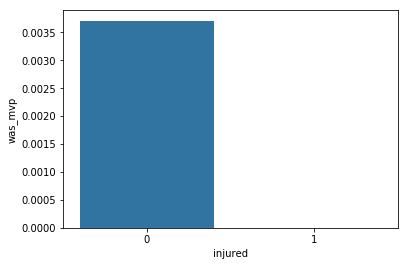

In [15]:
sns.barplot(data = stats_df
            ,x = 'injured'
            ,y = 'was_mvp',
            ci = None
            )

In [16]:
stats_df[stats_df["was_mvp"] == 1]['Name']

1        Kareem Abdul-Jabbar
403               Bob McAdoo
522      Kareem Abdul-Jabbar
796      Kareem Abdul-Jabbar
1490             Bill Walton
1724            Moses Malone
1870     Kareem Abdul-Jabbar
2321           Julius Erving
2813            Moses Malone
3185            Moses Malone
3369              Larry Bird
3712              Larry Bird
4077              Larry Bird
4595           Magic Johnson
5004          Michael Jordan
5417           Magic Johnson
5868           Magic Johnson
6344          Michael Jordan
6797          Michael Jordan
7067         Charles Barkley
7817         Hakeem Olajuwon
8310          David Robinson
8655          Michael Jordan
9269             Karl Malone
9779          Michael Jordan
10360            Karl Malone
10929       Shaquille O'Neal
11308          Allen Iverson
11764             Tim Duncan
12249             Tim Duncan
12793          Kevin Garnett
13570             Steve Nash
14137             Steve Nash
14685          Dirk Nowitzki
14940         

In [17]:
stats_df[stats_df["was_mvp"] == 1]['Name']

1        Kareem Abdul-Jabbar
403               Bob McAdoo
522      Kareem Abdul-Jabbar
796      Kareem Abdul-Jabbar
1490             Bill Walton
1724            Moses Malone
1870     Kareem Abdul-Jabbar
2321           Julius Erving
2813            Moses Malone
3185            Moses Malone
3369              Larry Bird
3712              Larry Bird
4077              Larry Bird
4595           Magic Johnson
5004          Michael Jordan
5417           Magic Johnson
5868           Magic Johnson
6344          Michael Jordan
6797          Michael Jordan
7067         Charles Barkley
7817         Hakeem Olajuwon
8310          David Robinson
8655          Michael Jordan
9269             Karl Malone
9779          Michael Jordan
10360            Karl Malone
10929       Shaquille O'Neal
11308          Allen Iverson
11764             Tim Duncan
12249             Tim Duncan
12793          Kevin Garnett
13570             Steve Nash
14137             Steve Nash
14685          Dirk Nowitzki
14940         

In [18]:
club_50_40_90['Name']

4461        Larry Bird
4840        Larry Bird
5541        Mark Price
7787     Reggie Miller
14137       Steve Nash
14685    Dirk Nowitzki
15243       Steve Nash
15836       Steve Nash
16436       Steve Nash
17937     Kevin Durant
19740    Stephen Curry
Name: Name, dtype: object

In [19]:
club_50_40_90['Year']

4461     1987.0
4840     1988.0
5541     1989.0
7787     1994.0
14137    2006.0
14685    2007.0
15243    2008.0
15836    2009.0
16436    2010.0
17937    2013.0
19740    2016.0
Name: Year, dtype: float64

In [20]:
stats_df = stats_df.drop(columns = ['Pos', 'Name', 'Tm'])
X = stats_df.drop(columns = ['was_mvp'])
y = stats_df['was_mvp']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.7, random_state = 23)

In [22]:
random_classif = RFC()
random_classif.fit(X_train, y_train)

/home/jc/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [23]:
f1_score(y_test, random_classif.predict(X_test), average='macro')

0.5945558574983087

In [24]:
selector2 = SelectKBest(f_classif, k = 10)
scaler = StandardScaler()
random_classif2 = RFC()
pipe = make_pipeline(selector2,scaler,random_classif2)
pipe.fit(X_train, y_train)

/home/jc/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [49] are constant.
  UserWarning)
/home/jc/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/jc/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('selectkbest',
                 SelectKBest(k=10,
                             score_func=<function f_classif at 0x7f5620076730>)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=F

In [25]:
f1_score(y_test, pipe.predict(X_test), average='macro')

/home/jc/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.4992376213787016